In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("Data.csv")
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  24.56     Yes              No     No              20   
1               No  30.23      No              No     No               0   
2               No  29.12     Yes              No     No               0   
3              Yes  30.23      No              No     No               0   
4               No  20.81     Yes              No    Yes               0   
...            ...    ...     ...             ...    ...             ...   
59063          Yes  21.93     Yes              No     No              20   
59064           No  24.68     Yes              No     No               0   
59065          Yes  20.38      No              No     No               5   
59066           No  25.86     Yes              No     No              30   
59067          Yes  26.50      No              No     No               0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0              15.0          No  Female        50-54  Hispanic       No   
1               0.0          No  Female        75-79     White       No   
2               0.0          No  Female  80 or older     White       No   
3               0.0          No  Female  80 or older     White       No   
4               0.0          No    Male        65-69     White       No   
...             ...         ...     ...          ...       ...      ...   
59063           0.0          No  Female        70-74     White      Yes   
59064           0.0         Yes    Male  80 or older     White       No   
59065           4.0          No  Female        65-69     White       No   
59066           0.0         Yes    Male        65-69     White       No   
59067           0.0          No  Female        65-69     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes       Good          6     No            No         No  
1                  Yes  Excellent          7     No            No         No  
2                  Yes  Excellent          7    Yes            No         No  
3                  Yes  Very good          8     No            No         No  
4                  Yes       Fair          8     No            No         No  
...                ...        ...        ...    ...           ...        ...  
59063              Yes       Fair          4    Yes            No        Yes  
59064              Yes  Very good          6     No            No        Yes  
59065              Yes       Good          7     No            No         No  
59066               No       Good          7     No            No        Yes  
59067               No  Very good          7     No            No         No  

[59068 rows x 18 columns]

In [7]:
df.isnull().sum()

HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth        28
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            9
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

In [13]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [4]:
# Calculate skewness of a numerical column
skewness = df['MentalHealth'].skew()
print(f"Skewness: {skewness}")


Skewness: 2.175837313279131


*A skewness of 2.175 indicates a highly positively skewed distribution (since skewness > 0)*

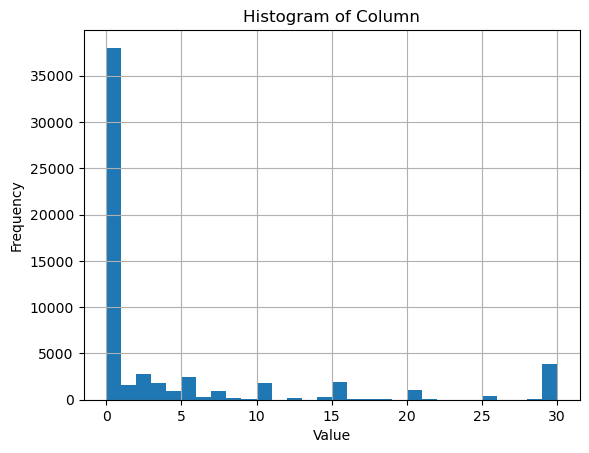

In [6]:
import matplotlib.pyplot as plt

# Plot histogram
df['MentalHealth'].hist(bins=30)
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


*As we can see that the histogram is not symmetric so choosing mean isn't a good approach*

In [8]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check for missing values and handle them if necessary
numeric_df = numeric_df.dropna()

# Calculate correlation
correlations = numeric_df.corr()

# View correlation of 'MentalHealth' with other
print(correlations['MentalHealth'].sort_values(ascending=False))


MentalHealth      1.000000
PhysicalHealth    0.317355
BMI               0.070601
SleepTime        -0.121322
Name: MentalHealth, dtype: float64


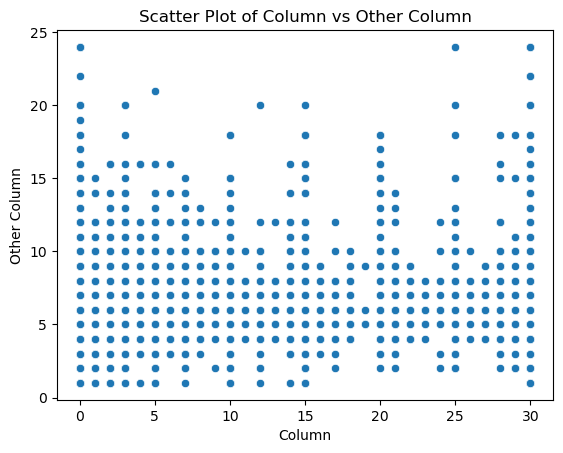

In [9]:
import seaborn as sns

# Replace 'other_column' with the column name strongly correlated with 'column'
sns.scatterplot(x=df['MentalHealth'], y=df['SleepTime'])
plt.title('Scatter Plot of Column vs Other Column')
plt.xlabel('Column')
plt.ylabel('Other Column')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Simulate missing data by splitting known data into train and test sets
train_data, test_data = train_test_split(df[df['MentalHealth'].notnull()], test_size=0.2, random_state=42)

# Separate the features and target variable
X_train = train_data[['PhysicalHealth']]
y_train = train_data['MentalHealth']
X_test = test_data[['PhysicalHealth']]
y_test = test_data['MentalHealth']

# Impute missing values using the median
median_value = y_train.median()
median_predictions = [median_value] * len(y_test)

# Calculate MAE for median imputation
median_mae = mean_absolute_error(y_test, median_predictions)
print("Median Imputation MAE:", median_mae)


Median Imputation MAE: 4.280741869918699


Comparing
+ *Median Imputation MAE: 4.280741869918699* 
+ *KNN Imputation MAE: 5.668868563685637* 
+ *Regression Imputation MAE: 5.4539536078457385*

It seems that Median Imputation provides a better performance in terms of minimizing the Mean Absolute Error (MAE). This suggests that in this case, the median imputation might be more appropriate for handling missing values in the MentalHealth feature compared to the Regression and KNN imputation.

In [12]:
import pandas as pd

# Assuming 'df' is your original DataFrame with missing values in the 'MentalHealth' column
df_copy = df.copy()  # Create a copy of the DataFrame

column_name = 'MentalHealth'

# Check if the column exists
if column_name in df_copy.columns:
    # Calculate the median of the column
    median_value = df_copy[column_name].median()

    # Replace missing values with the median (without using inplace=True)
    df_copy[column_name] = df_copy[column_name].fillna(median_value)

    # Check the DataFrame after imputation
    print(f"Missing values in '{column_name}' column after imputation: {df_copy[column_name].isnull().sum()}")  # Should show 0 missing values

    # Save the updated DataFrame to a CSV file
    df_copy.to_csv('updated_data.csv', index=False)  # Save to CSV without index
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Missing values in 'MentalHealth' column after imputation: 0


using sk-learn
import pandas as pd
from sklearn.impute import SimpleImputer

###### Assuming 'df' is your DataFrame with missing values in 'MentalHealth' column
###### Initialize the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

###### Apply the imputer to the column with missing values
df['MentalHealth'] = imputer.fit_transform(df[['MentalHealth']])

###### Check the DataFrame after imputation
print(df['MentalHealth'].isnull().sum())  # Should show 0 missing values


In [14]:
df_copy

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  24.56     Yes              No     No              20   
1               No  30.23      No              No     No               0   
2               No  29.12     Yes              No     No               0   
3              Yes  30.23      No              No     No               0   
4               No  20.81     Yes              No    Yes               0   
...            ...    ...     ...             ...    ...             ...   
59063          Yes  21.93     Yes              No     No              20   
59064           No  24.68     Yes              No     No               0   
59065          Yes  20.38      No              No     No               5   
59066           No  25.86     Yes              No     No              30   
59067          Yes  26.50      No              No     No               0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0              15.0          No  Female        50-54  Hispanic       No   
1               0.0          No  Female        75-79     White       No   
2               0.0          No  Female  80 or older     White       No   
3               0.0          No  Female  80 or older     White       No   
4               0.0          No    Male        65-69     White       No   
...             ...         ...     ...          ...       ...      ...   
59063           0.0          No  Female        70-74     White      Yes   
59064           0.0         Yes    Male  80 or older     White       No   
59065           4.0          No  Female        65-69     White       No   
59066           0.0         Yes    Male        65-69     White       No   
59067           0.0          No  Female        65-69     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes       Good          6     No            No         No  
1                  Yes  Excellent          7     No            No         No  
2                  Yes  Excellent          7    Yes            No         No  
3                  Yes  Very good          8     No            No         No  
4                  Yes       Fair          8     No            No         No  
...                ...        ...        ...    ...           ...        ...  
59063              Yes       Fair          4    Yes            No        Yes  
59064              Yes  Very good          6     No            No        Yes  
59065              Yes       Good          7     No            No         No  
59066               No       Good          7     No            No        Yes  
59067               No  Very good          7     No            No         No  

[59068 rows x 18 columns]

In [15]:
print(df_copy['GenHealth'].unique())


['Good' 'Excellent' 'Very good' 'Fair' 'Poor' nan]


In [16]:
df_copy.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           9
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Now the GenHealth is a categorical column

In [18]:
print("Missing values before imputation:", df_copy['GenHealth'].isna().sum())


Missing values before imputation: 9


In [19]:
# Step 1: Impute missing values in 'GenHealth' using the mode
mode_value = df_copy['GenHealth'].mode()[0]  # Get the most frequent value (mode)
df_copy['GenHealth'] = df_copy['GenHealth'].fillna(mode_value)  # Replace missing values with the mode

# Step 2: Save the updated DataFrame to a CSV file
df_copy.to_csv('imputed_data.csv', index=False)  # Save to CSV without index

Mode Imputation: This is one of the simplest and fastest method of dealing with missing data, where missing values are replaced with the mode of a categorical variable. It, however, poses the risk of overrepresentation of one category in a variable leading to underestimation of variance in the variable. Low variation in X may lead to over optimistic results. Mode imputation requires data to be MCAR; it results in biased estimates otherwise

https://www.sciencedirect.com/science/article/pii/S2352914823002289

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df_copy is your DataFrame with missing values
# Step 1: Convert the 'GenHealth' column (categorical) to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'GenHealth' column if it is categorical
if df_copy['GenHealth'].dtype == 'object':  # Check if 'GenHealth' is categorical
    df_copy['GenHealth'] = label_encoder.fit_transform(df_copy['GenHealth'].astype(str))  # Ensure all values are string before encoding

# Step 2: Apply KNN Imputation (on all columns except 'GenHealth')
X = df_copy.drop(columns=['GenHealth'])  # Features (exclude target column 'GenHealth')
knn_imputer = KNNImputer(n_neighbors=3)  # You can adjust n_neighbors based on your data
X_imputed = knn_imputer.fit_transform(X)  # Impute missing values in features

# Step 3: Reconstruct the DataFrame after imputation (if necessary)
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Re-add the 'GenHealth' column after imputation (and ensure 'GenHealth' remains unmodified in df_copy)
df_imputed['GenHealth'] = df_copy['GenHealth']

# Update df_copy with the imputed values
df_copy[df_imputed.columns] = df_imputed

# Save the updated DataFrame to a CSV file
df_copy.to_csv('imputed_data.csv', index=False)  # Save to CSV without index


In [23]:
print("Missing values before imputation:", df_copy['GenHealth'].isna().sum())


Missing values before imputation: 0


In [24]:
df_copy.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# What are Outliers?
We all have heard of the idiom ‘odd one out which means something unusual in comparison to the others in a group. Similarly, an Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier treatment is vastly larger or smaller than the remaining values in the set.

# Why Do they Occur?
An outlier may occur due to the variability in the data, or due to experimental error/human error.

They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

# What Do They Affect?
In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

Mean is the accurate measure to describe the data when we do not have any outliers present.
Median is used if there is an outlier in the dataset.
Mode is used if there is an outlier AND about ½ or more of the data is the same.
Mean’ is the only measure of central tendency that is affected by the outlier treatment which in turn impacts Standard deviation.

# Detecting Outliers
If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

Boxplots
Z-score
Inter Quantile Range(IQR)

# Detecting Outliers using the Z-scores
Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier treatment.



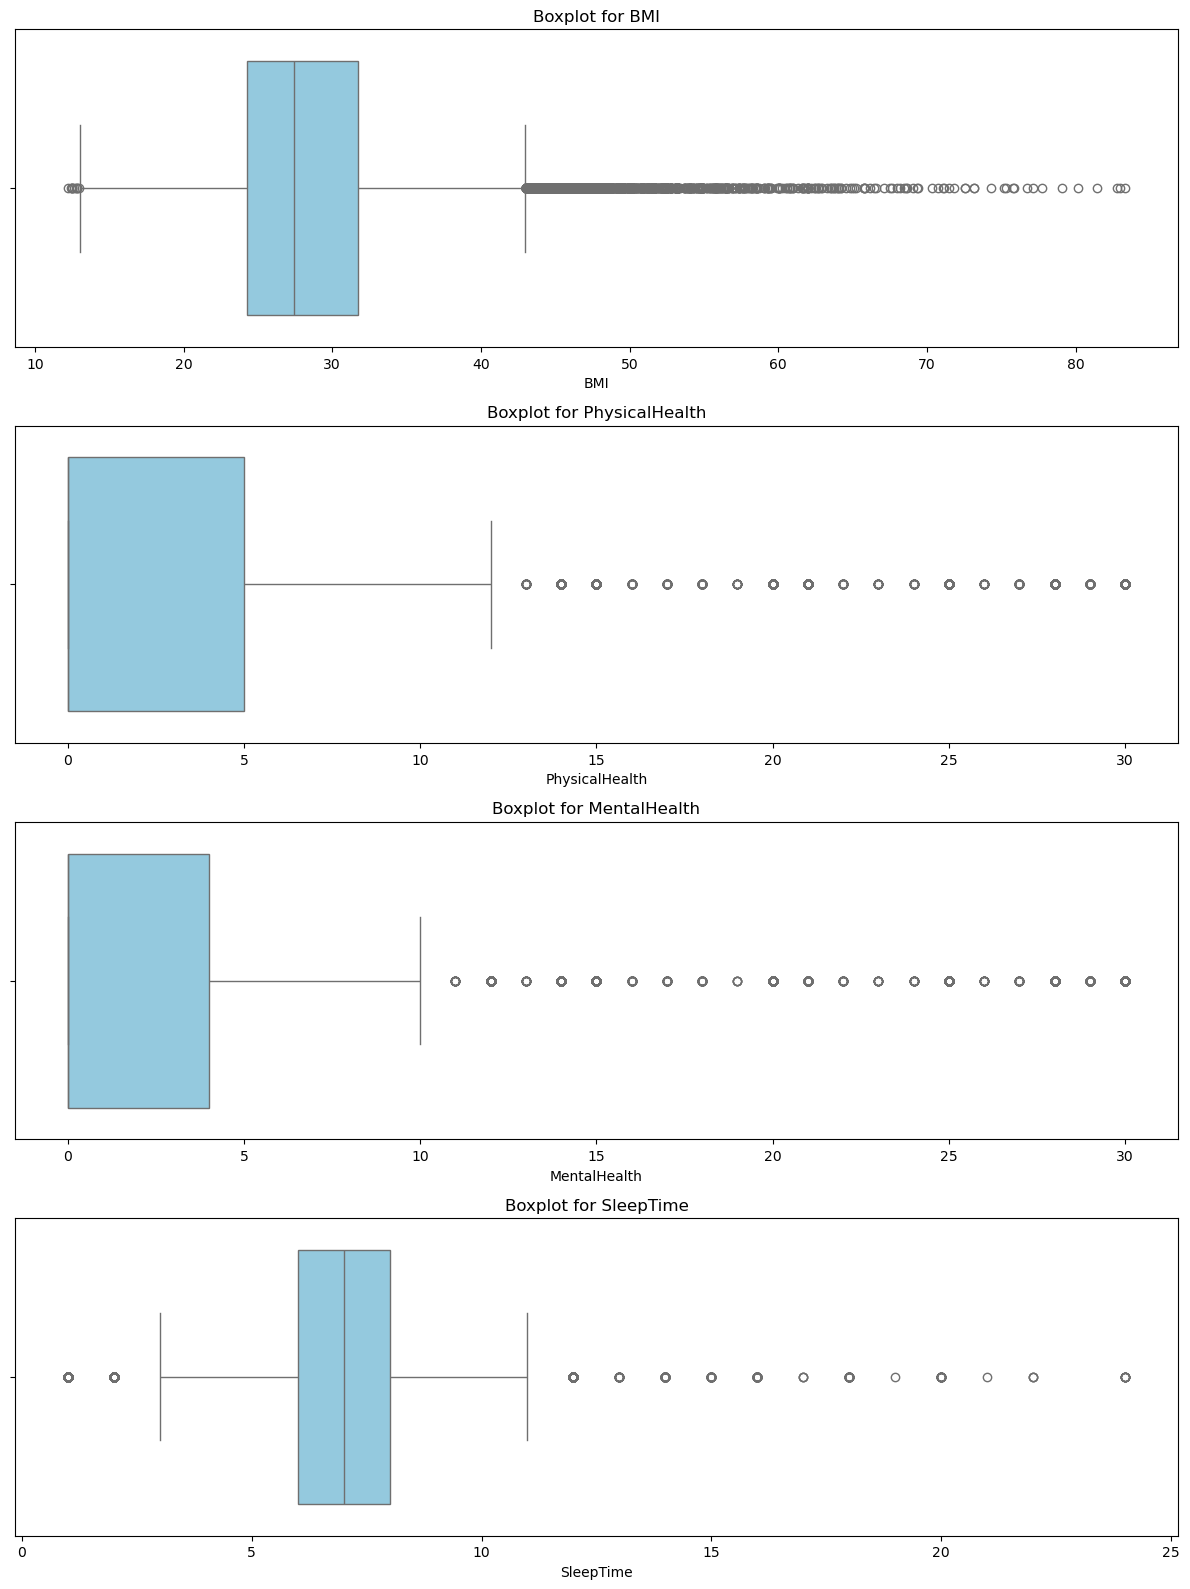

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, len(numeric_cols) * 4))  # Adjust the figure size
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


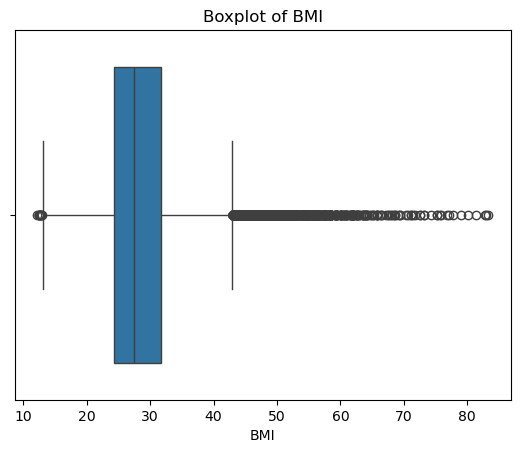

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()


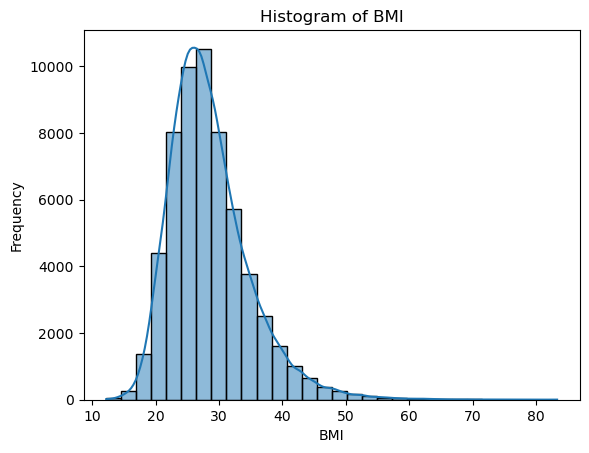

In [32]:
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [33]:
skeww = df["BMI"].skew()
skeww

1.2682665906786597

skewness matches ydata profiling

Outliers based on IQR method: 1799
Outliers based on Z-Score method: 742


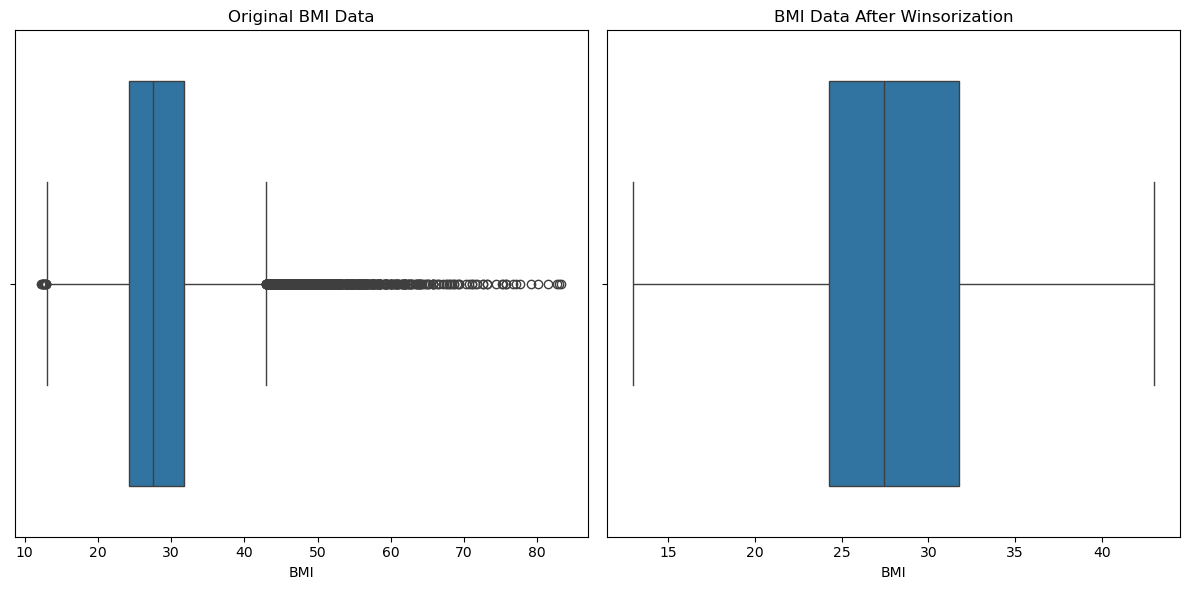

Original Data Statistics:
count    59068.000000
mean        28.571367
std          6.415493
min         12.210000
25%         24.250000
50%         27.460000
75%         31.750000
max         83.330000
Name: BMI, dtype: float64

Winsorized Data Statistics:
count    59068.000000
mean        28.402214
std          5.851002
min         13.000000
25%         24.250000
50%         27.460000
75%         31.750000
max         43.000000
Name: BMI, dtype: float64


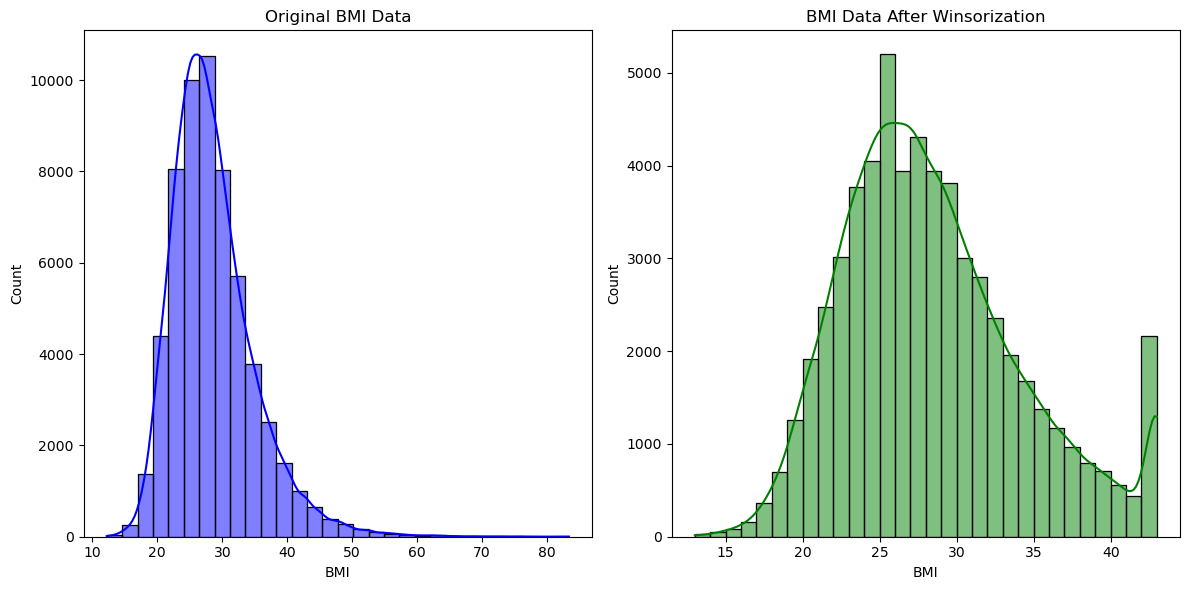

ValueError: could not convert string to float: 'No'

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'BMI' is the column of interest

# 1. Identify Outliers using IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
iqr_value = iqr(df['BMI'])
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value

# Count of outliers based on IQR method
outliers_iqr = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# 2. Identify Outliers using Z-Score
z_scores = np.abs(stats.zscore(df['BMI']))
outliers_z_score = df[z_scores > 3]  # Considering Z-Score threshold of 3

# Number of Outliers in both methods
print(f"Outliers based on IQR method: {outliers_iqr.shape[0]}")
print(f"Outliers based on Z-Score method: {outliers_z_score.shape[0]}")

# 3. Apply Winsorization to bring outliers within boundary using IQR method
df_winsorized = df.copy()
df_winsorized['BMI'] = np.clip(df_winsorized['BMI'], lower_bound, upper_bound)

# 4. Visualize the data before and after Winsorization
plt.figure(figsize=(12, 6))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BMI'])
plt.title('Original BMI Data')

# Winsorized data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_winsorized['BMI'])
plt.title('BMI Data After Winsorization')

plt.tight_layout()
plt.show()

# 5. Summary statistics before and after Winsorization
print("Original Data Statistics:")
print(df['BMI'].describe())

print("\nWinsorized Data Statistics:")
print(df_winsorized['BMI'].describe())

# Optional: You can also visualize histograms or KDEs to see the effect
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=30, color='blue')
plt.title('Original BMI Data')

# Winsorized data histogram
plt.subplot(1, 2, 2)
sns.histplot(df_winsorized['BMI'], kde=True, bins=30, color='green')
plt.title('BMI Data After Winsorization')

plt.tight_layout()
plt.show()

# 6. Train a regression model on both original and winsorized datasets and evaluate the performance

def train_regression_model(data, target='BMI'):
    # Create feature and target
    X = data.drop(columns=[target])
    y = data[target]
    
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) and R-squared (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Train models on original and Winsorized datasets
mse_original, r2_original = train_regression_model(df)
mse_winsorized, r2_winsorized = train_regression_model(df_winsorized)

# Print results
print(f"Original Data - MSE: {mse_original:.4f}, R²: {r2_original:.4f}")
print(f"Winsorized Data - MSE: {mse_winsorized:.4f}, R²: {r2_winsorized:.4f}")


What the Results Suggest:
MSE (Mean Squared Error) is slightly better for the Winsorized data, which suggests that removing extreme outliers by clipping their values has improved the model's prediction accuracy to a small extent.

R² (R-squared) is the same for both datasets, meaning the model's ability to explain the variance of the data remains unchanged despite removing outliers. The model still only explains about 11.24% of the variance.

In [ ]:
y = df_winsorized['BMI'].skew()
y

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['PhysicalHealth'])
plt.title('Boxplot of PhysicalHealth')
plt.show()


In [ ]:
sns.histplot(df['PhysicalHealth'], kde=True, bins=30)
plt.title('Histogram of PhysicalHealth')
plt.xlabel('PhysicalHealth')
plt.ylabel('Frequency')
plt.show()


In [ ]:
phskew = df["PhysicalHealth"].skew()
phskew

In [ ]:
# Assuming df is your DataFrame and 'Physical Health' is the column of interest

# Step 1: Identify Outliers using IQR
Q1 = df['PhysicalHealth'].quantile(0.25)
Q3 = df['PhysicalHealth'].quantile(0.75)
iqr_value = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * iqr_value
upper_bound_iqr = Q3 + 1.5 * iqr_value

# Apply IQR-based Winsorization
df_iqr_winsorized = df.copy()
df_iqr_winsorized['PhysicalHealth'] = np.clip(
    df_iqr_winsorized['PhysicalHealth'], lower_bound_iqr, upper_bound_iqr
)

# Step 2: Identify Outliers using Z-Score
z_scores = np.abs(stats.zscore(df['PhysicalHealth']))
z_threshold = 3  # Z-Score threshold
lower_bound_z = df['PhysicalHealth'][z_scores <= z_threshold].min()
upper_bound_z = df['PhysicalHealth'][z_scores <= z_threshold].max()

# Apply Z-Score-based Winsorization
df_zscore_winsorized = df.copy()
df_zscore_winsorized['PhysicalHealth'] = np.clip(
    df_zscore_winsorized['PhysicalHealth'], lower_bound_z, upper_bound_z
)

# Step 3: Train Regression Models and Compare Accuracy

def train_regression_model(data, target='PhysicalHealth'):
    # Create features and target
    X = data.drop(columns=[target])
    y = data[target]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Train models on original, IQR-Winsorized, and Z-Score-Winsorized datasets
mse_original, r2_original = train_regression_model(df, target='PhysicalHealth')
mse_iqr, r2_iqr = train_regression_model(df_iqr_winsorized, target='PhysicalHealth')
mse_zscore, r2_zscore = train_regression_model(df_zscore_winsorized, target='PhysicalHealth')

# Step 4: Print Results
print(f"Original Data - MSE: {mse_original:.4f}, R²: {r2_original:.4f}")
print(f"IQR-Winsorized Data - MSE: {mse_iqr:.4f}, R²: {r2_iqr:.4f}")
print(f"Z-Score-Winsorized Data - MSE: {mse_zscore:.4f}, R²: {r2_zscore:.4f}")

# Optional: Visualize the Distributions
plt.figure(figsize=(18, 6))

# Original data
plt.subplot(1, 3, 1)
sns.histplot(df['PhysicalHealth'], kde=True, bins=30, color='blue')
plt.title('Original Physical Health Distribution')

# IQR Winsorized data
plt.subplot(1, 3, 2)
sns.histplot(df_iqr_winsorized['PhysicalHealth'], kde=True, bins=30, color='green')
plt.title('IQR Winsorized Physical Health Distribution')

# Z-Score Winsorized data
plt.subplot(1, 3, 3)
sns.histplot(df_zscore_winsorized['PhysicalHealth'], kde=True, bins=30, color='orange')
plt.title('Z-Score Winsorized Physical Health Distribution')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['MentalHealth'])
plt.title('Boxplot of MentalHealth')
plt.show()


In [ ]:
sns.histplot(df['MentalHealth'], kde=True, bins=30)
plt.title('Histogram of MentalHealth')
plt.xlabel('MentalHealth')
plt.ylabel('Frequency')
plt.show()


In [ ]:
mhskew = df["MentalHealth"].skew()
mhskew

In [ ]:
sns.histplot(df['MentalHealth'], kde=True, color='blue')
plt.title('MentalHealth Distribution')
plt.show()


In [ ]:
# IQR Method
Q1 = df['MentalHealth'].quantile(0.25)
Q3 = df['MentalHealth'].quantile(0.75)
iqr_value = iqr(df['MentalHealth'])
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value
outliers_iqr = df[(df['MentalHealth'] < lower_bound) | (df['MentalHealth'] > upper_bound)]

# Z-Score Method
z_scores = np.abs(stats.zscore(df['MentalHealth']))
outliers_z_score = df[z_scores > 3]


In [ ]:
# IQR-Based Winsorization
df_winsorized_iqr = df.copy()
df_winsorized_iqr['MentalHealth'] = np.clip(df['MentalHealth'], lower_bound, upper_bound)

# Z-Score-Based Winsorization (if required)
z_threshold = 3  # Adjust as needed
df_winsorized_z = df.copy()
df_winsorized_z['MentalHealth'] = np.where(z_scores > z_threshold, 
                                           df['MentalHealth'].quantile(0.95), 
                                           df['MentalHealth'])


In [ ]:
print("Skewness After IQR Winsorization:", df_winsorized_iqr['MentalHealth'].skew())
print("Skewness After Z-Score Winsorization:", df_winsorized_z['MentalHealth'].skew())


In [ ]:
mse_original, r2_original = train_regression_model(df, target='MentalHealth')
mse_winsorized_iqr, r2_winsorized_iqr = train_regression_model(df_winsorized_iqr, target='MentalHealth')
mse_winsorized_z, r2_winsorized_z = train_regression_model(df_winsorized_z, target='MentalHealth')

print(f"Original Data - MSE: {mse_original:.4f}, R²: {r2_original:.4f}")
print(f"IQR Winsorized Data - MSE: {mse_winsorized_iqr:.4f}, R²: {r2_winsorized_iqr:.4f}")
print(f"Z-Score Winsorized Data - MSE: {mse_winsorized_z:.4f}, R²: {r2_winsorized_z:.4f}")


In [ ]:
# Assuming df is your DataFrame and 'Physical Health' is the column of interest

# Step 1: Identify Outliers using IQR
Q1 = df['MentalHealth'].quantile(0.25)
Q3 = df['MentalHealth'].quantile(0.75)
iqr_value = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * iqr_value
upper_bound_iqr = Q3 + 1.5 * iqr_value

# Apply IQR-based Winsorization
df_iqr_winsorized = df.copy()
df_iqr_winsorized['MentalHealth'] = np.clip(
    df_iqr_winsorized['MentalHealth'], lower_bound_iqr, upper_bound_iqr
)

# Step 2: Identify Outliers using Z-Score
z_scores = np.abs(stats.zscore(df['MentalHealth']))
z_threshold = 3  # Z-Score threshold
lower_bound_z = df['MentalHealth'][z_scores <= z_threshold].min()
upper_bound_z = df['MentalHealth'][z_scores <= z_threshold].max()

# Apply Z-Score-based Winsorization
df_zscore_winsorized = df.copy()
df_zscore_winsorized['MentalHealth'] = np.clip(
    df_zscore_winsorized['MentalHealth'], lower_bound_z, upper_bound_z
)

# Step 3: Train Regression Models and Compare Accuracy

def train_regression_model(data, target='MentalHealth'):
    # Create features and target
    X = data.drop(columns=[target])
    y = data[target]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Train models on original, IQR-Winsorized, and Z-Score-Winsorized datasets
mse_original, r2_original = train_regression_model(df, target='MentalHealth')
mse_iqr, r2_iqr = train_regression_model(df_iqr_winsorized, target='MentalHealth')
mse_zscore, r2_zscore = train_regression_model(df_zscore_winsorized, target='MentalHealth')

# Step 4: Print Results
print(f"Original Data - MSE: {mse_original:.4f}, R²: {r2_original:.4f}")
print(f"IQR-Winsorized Data - MSE: {mse_iqr:.4f}, R²: {r2_iqr:.4f}")
print(f"Z-Score-Winsorized Data - MSE: {mse_zscore:.4f}, R²: {r2_zscore:.4f}")

# Optional: Visualize the Distributions
plt.figure(figsize=(18, 6))

# Original data
plt.subplot(1, 3, 1)
sns.histplot(df['MentalHealth'], kde=True, bins='fd', color='blue')
plt.title('Original MentalHealth Distribution')

# IQR Winsorized data
plt.subplot(1, 3, 2)
sns.histplot(df_iqr_winsorized['MentalHealth'], kde=True, bins='fd', color='green')
plt.title('IQR Winsorized Physical Health Distribution')

# Z-Score Winsorized data
plt.subplot(1, 3, 3)
sns.histplot(df_zscore_winsorized['MentalHealth'], kde=True, bins=30, color='orange')
plt.title('Z-Score Winsorized Physical Health Distribution')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['SleepTime'])
plt.title('Boxplot of SleepTime')
plt.show()


In [ ]:
sns.histplot(df['SleepTime'], kde=True, bins='fd')
plt.title('Histogram of SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()


In [ ]:
stskew = df["SleepTime"].skew()
stskew

In [ ]:
# Step 1: Identify Outliers using IQR
Q1 = df['SleepTime'].quantile(0.25)
Q3 = df['SleepTime'].quantile(0.75)
iqr_value = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * iqr_value
upper_bound_iqr = Q3 + 1.5 * iqr_value

# Apply IQR-based Winsorization
df_iqr_winsorized = df.copy()
df_iqr_winsorized['SleepTime'] = np.clip(
    df_iqr_winsorized['SleepTime'], lower_bound_iqr, upper_bound_iqr
)


In [ ]:
# Step 2: Identify Outliers using Z-Score
z_scores = np.abs(stats.zscore(df['SleepTime']))
z_threshold = 3  # Z-Score threshold
lower_bound_z = df['SleepTime'][z_scores <= z_threshold].min()
upper_bound_z = df['SleepTime'][z_scores <= z_threshold].max()

# Apply Z-Score-based Winsorization
df_zscore_winsorized = df.copy()
df_zscore_winsorized['SleepTime'] = np.clip(
    df_zscore_winsorized['SleepTime'], lower_bound_z, upper_bound_z
)


In [ ]:
# Train models on original, IQR-Winsorized, and Z-Score-Winsorized datasets
mse_original, r2_original = train_regression_model(df, target='SleepTime')
mse_iqr, r2_iqr = train_regression_model(df_iqr_winsorized, target='SleepTime')
mse_zscore, r2_zscore = train_regression_model(df_zscore_winsorized, target='SleepTime')

# Step 4: Print Results
print(f"Original Data - MSE: {mse_original:.4f}, R²: {r2_original:.4f}")
print(f"IQR-Winsorized Data - MSE: {mse_iqr:.4f}, R²: {r2_iqr:.4f}")
print(f"Z-Score-Winsorized Data - MSE: {mse_zscore:.4f}, R²: {r2_zscore:.4f}")


In [ ]:
plt.figure(figsize=(18, 6))

# Original data
plt.subplot(1, 3, 1)
sns.histplot(df['SleepTime'], kde=True, bins='fd', color='blue')
plt.title('Original SleepTime Distribution')

# IQR Winsorized data
plt.subplot(1, 3, 2)
sns.histplot(df_iqr_winsorized['SleepTime'], kde=True, bins='fd', color='green')
plt.title('IQR Winsorized SleepTime Distribution')

# Z-Score Winsorized data
plt.subplot(1, 3, 3)
sns.histplot(df_zscore_winsorized['SleepTime'], kde=True, bins=30, color='orange')
plt.title('Z-Score Winsorized SleepTime Distribution')

plt.tight_layout()
plt.show()


In [ ]:
category_counts = df['HeartDisease'].value_counts()
category_counts

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['HeartDisease'])
plt.title('Boxplot of HeartDisease')
plt.show()


In [ ]:
sns.histplot(df['HeartDisease'], kde=True, bins='fd')
plt.title('Histogram of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.show()


In [ ]:
hdskew = df["HeartDisease"].skew()
hdskew